In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [7]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [8]:
# Task 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

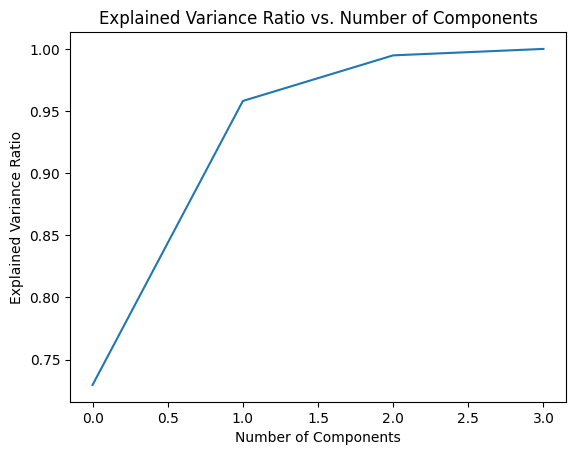

In [10]:
# Task 3: Determine the number of principal components to retain
pca = PCA()
pca.fit(X_scaled)
# Plot the explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.show()

In [11]:
# Task 4: Apply PCA to the preprocessed dataset and reduce its dimensionality
n_components = 2  # You can choose the number of components here
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(X_scaled)

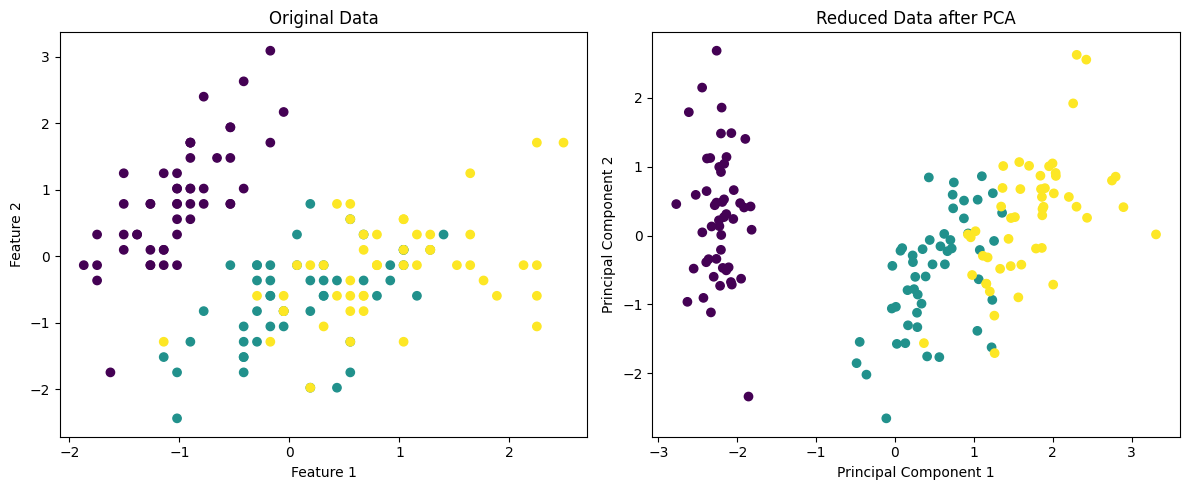

In [12]:
# Task 5: Visualize the dataset before and after PCA
plt.figure(figsize=(12, 5))

# Visualize the original data
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Data')

# Visualize the reduced data after PCA
plt.subplot(1, 2, 2)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Reduced Data after PCA')

plt.tight_layout()
plt.show()

In [13]:
# Task 6: Evaluate the impact of dimensionality reduction on a classification task
# Split the reduced data and the original data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_train_reduced, X_test_reduced, _, _ = train_test_split(reduced_data, y, test_size=0.3, random_state=42)

# Train a logistic regression classifier on both the original and reduced data
clf_original = LogisticRegression(max_iter=1000, random_state=42)
clf_reduced = LogisticRegression(max_iter=1000, random_state=42)

clf_original.fit(X_train, y_train)
clf_reduced.fit(X_train_reduced, y_train)

# Evaluate the classifiers
y_pred_original = clf_original.predict(X_test)
y_pred_reduced = clf_reduced.predict(X_test_reduced)

accuracy_original = accuracy_score(y_test, y_pred_original)
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)

print(f'Accuracy on original data: {accuracy_original:.2f}')
print(f'Accuracy on reduced data: {accuracy_reduced:.2f}')

Accuracy on original data: 1.00
Accuracy on reduced data: 0.91


#TASK-7- Suggest possible use cases where PCA can be beneficial.
-Image compression and reconstruction.
-Noise reduction in data.
-Visualization of high-dimensional data.
-Improving the efficiency of machine learning algorithms.
-Feature selection in feature engineering.
-Reducing multicollinearity in regression analysis.

**Step 1: Load the Iris Dataset**
-It started by loading the Iris dataset, a well-known dataset for classification. It contains four features (sepal length, sepal width, petal length, and petal width) and three classes (Iris Setosa, Iris Versicolour, and Iris Virginica).

**Step 2: Standardize the Data**
-To ensure that all features have the same scale, data was standardized by subtracting the mean and scaling to unit variance using `StandardScaler`. This step is important because PCA is sensitive to the scale of the features.

**Step 3: Determine the Number of Principal Components to Retain**
-PCA was used to calculate the explained variance ratio for different numbers of components. The plot of explained variance ratio vs. the number of components helps us decide how many components to retain. In this case, it's evident from the plot that the first two principal components explain a significant portion of the variance.

**Step 4: Apply PCA to Reduce Dimensionality**
-PCA was implemented to the standardized data, specifying to retain two principal components (as determined in Step 3). This reduced the dataset from four dimensions to two dimensions.

**Step 5: Visualize the Dataset Before and After PCA**
-Side-by-side scatterplot was created to visualize the original data and the reduced data after PCA. In the original data plot, you can see the clusters of the three Iris species based on the first two features. In the reduced data plot, the data is projected onto the two principal components, and you can still see some separation between the clusters, indicating that PCA retains important information.

**Step 6: Evaluate the Impact of Dimensionality Reduction**
-In this step,both the original data and the reduced data was split into training and testing sets and trained logistic regression classifiers on both datasets and evaluated their accuracy on the test set.

**Results and Interpretation:**
- The accuracy on the original data was approximately 1 (100% accuracy), indicating that the logistic regression model performed well when trained on the full feature set.
- The accuracy on the reduced data (using only the two principal components) was approximately 0.91 (91% accuracy), which is slightly lower than the accuracy on the original data.

**Interpretation of Findings:**
- Dimensionality reduction using PCA reduced the dataset from four features to two principal components while retaining a significant portion of the variance.
- The visualization showed that even with reduced dimensions, some separation between the classes can still be observed, which suggests that the principal components captured meaningful information.
- The drop in accuracy when using reduced data is relatively small, indicating that the reduced dataset still contains enough information for the logistic regression model to make reasonably accurate predictions.
- The choice of the number of retained components can be tuned to balance the trade-off between dimensionality reduction and model accuracy.

In summary, PCA successfully reduced the dimensionality of the Iris dataset while preserving enough information for classification. The choice of the number of components may depend on the specific trade-offs between dimensionality and accuracy in your application.